### Assignment 2
- In this assignment we are going to deal with tweets data regarding an airline.
- The data is present in csv form, and the tweets are present specifically in the ***text*** column of the data.
- First of all, we read our data using pandas. After that we did some pre-processing on the specific coulmn.
- We converted the data in lower case, eliminated all numbers, punctuations and stop words from the data.
- Next, we did lemmatization using spacy. we can also do this step and the above step in one function and using spacy.
- After that we computed number of character, number of words, sentences, excalamation, question mark, average word length, and stored this data in one dictionary.
- Then we converted dictionary in series and concatenated all the columns with our old data.
- After that we calculated the tf-idf matrix and polarity score of the sentiments.
- we plotted the sentiment score using countplot.
- And in the last we plotted the heat map of all the relevant and numeric values.
- we also have some duplicate rows so we deleted the duplicate data.

In [1]:
import pandas as pd
data = pd.read_csv('Tweets.csv')

In [2]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
#data['text'] = data['text'].str.lower()
#data['text']

In [5]:
#Preprocessing the data
import re
import string
from nltk.corpus import stopwords
def clean_text(text):
    #converting the text into lower case
    text = text.lower()
    #removing the punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    #removing numbers
    text = re.sub(r'\d+','',text)
    #removing extra spaces
    text = ' '.join(text.split())
    return text
data['text'] = data['text'].apply(clean_text)
data['text'].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

In [6]:
#tokenization and removing the stop words
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    #tokenizing the data
    tokens = word_tokenize(text)
    #setting the stop words to english stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens
data['text'] = data['text'].apply(tokenize_text)
data['text'].head()

0                      [virginamerica, dhepburn, said]
1    [virginamerica, plus, youve, added, commercial...
2    [virginamerica, didnt, today, must, mean, need...
3    [virginamerica, really, aggressive, blast, obn...
4             [virginamerica, really, big, bad, thing]
Name: text, dtype: object

In [7]:
#lemmetization using spacy
#loading the english library
import spacy
nlp = spacy.load("en_core_web_sm")

In [8]:
def lemmatize_text(text):
    #checking if the data is list convert into string because this line nlp = spacy.load("en_core_web_sm") accepts string not list
    #and our data is tokenized and is present in the form of list
    if isinstance(text,list):
        text = ' '.join(text)
    doc = nlp(text)
    lemmat = ' '.join(token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop)
    return lemmat

data['text'] = data['text'].apply(lemmatize_text)
data['text'].head()

0                           virginamerica dhepburn say
1    virginamerica plus ve add commercial experienc...
2               virginamerica not today mean need trip
3    virginamerica aggressive blast obnoxious enter...
4                          virginamerica big bad thing
Name: text, dtype: object

In [9]:
def extract_features(text):
    features ={}
    words = text.split()
    features['char_count'] = len(text)
    features['word_count'] = len(words)
    features['sentence_count'] =text.count('.') + text.count('!') + text.count('?')
    features['exclamation_count'] = text.count('!')
    features['question_mark_count'] = text.count('?')
    features['hashtag_count'] = text.count('#')
    features['mentions_count'] = text.count('@')
    features['avg_word_length'] = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
    return features
    
#data['features'] = data['text'].apply(extract_features)
#data['features'] 
#features = data['features'].apply(pd.Series)
features = data['text'].apply(extract_features).apply(pd.Series)
data = pd.concat([data,features], axis = 1)
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_location,user_timezone,char_count,word_count,sentence_count,exclamation_count,question_mark_count,hashtag_count,mentions_count,avg_word_length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,Eastern Time (US & Canada),26.0,3.0,0.0,0.0,0.0,0.0,0.0,8.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),53.0,7.0,0.0,0.0,0.0,0.0,0.0,6.714286
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,Lets Play,Central Time (US & Canada),38.0,6.0,0.0,0.0,0.0,0.0,0.0,5.500000
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),85.0,10.0,0.0,0.0,0.0,0.0,0.0,7.600000
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),27.0,4.0,0.0,0.0,0.0,0.0,0.0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,...,NaN,NaN,46.0,6.0,0.0,0.0,0.0,0.0,0.0,6.833333
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,...,Texas,NaN,104.0,15.0,0.0,0.0,0.0,0.0,0.0,6.000000
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,...,"Nigeria,lagos",NaN,45.0,5.0,0.0,0.0,0.0,0.0,0.0,8.200000
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,...,New Jersey,Eastern Time (US & Canada),70.0,9.0,0.0,0.0,0.0,0.0,0.0,6.888889


In [10]:
from textblob import TextBlob

data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
def sentiment_class(score):
    if score > 0 :
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'
data['sentiment_class'] = data['polarity'].apply(sentiment_class)

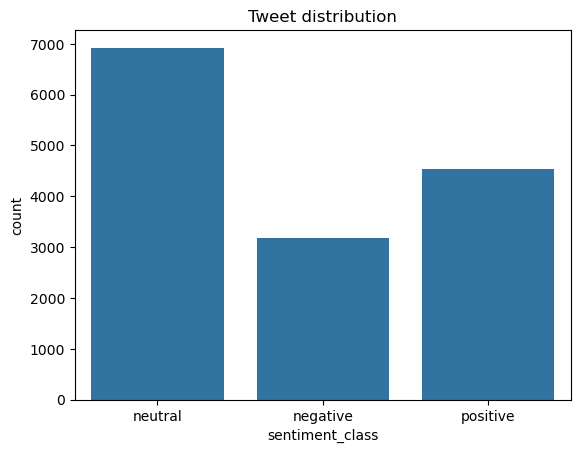

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment_class' , data = data)
plt.title("Tweet distribution")
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

#create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 20, ngram_range=(1,2), min_df = 2, max_df = 0.8)
#Fit and Transform
#tfidf_matrix = vectorizer.fit_transform(data['text'])
#feature_names = vectorizer.get_feature_names_out()

In [ ]:
#tfidf_matrix

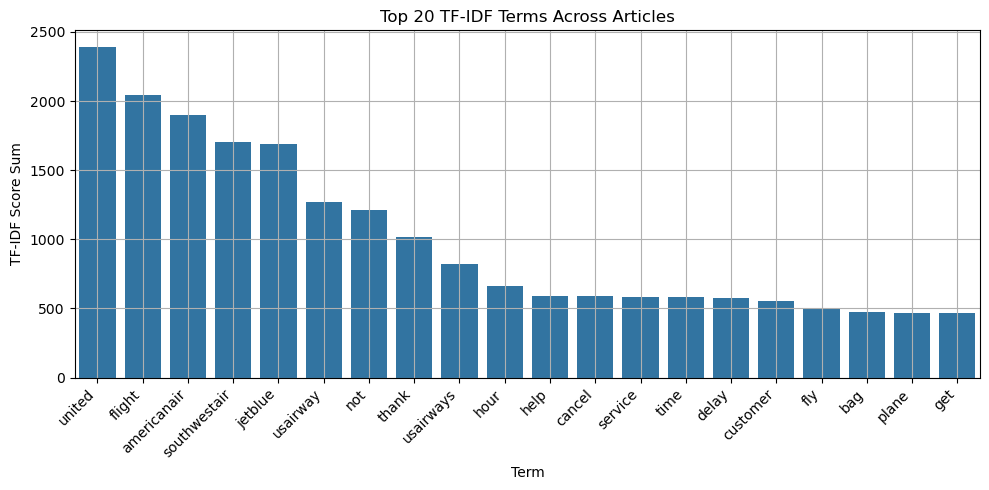

In [13]:
X = vectorizer.fit_transform(data['text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.title("Top 20 TF-IDF Terms Across Articles")
plt.ylabel("TF-IDF Score Sum")
plt.xlabel("Term")
plt.xticks(rotation=45, ha = 'right')
plt.grid(True)
plt.tight_layout()
plt.show()

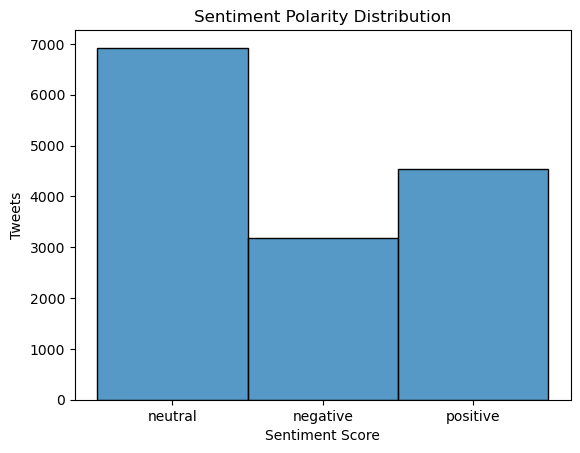

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['sentiment_class'], bins = 20)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Tweets")
plt.show()

In [ ]:
#for checking the duplicate columns in the data
#data.columns[data.columns.duplicated()]


In [ ]:
#for eliminating the dduplicate columns
#data = data.loc[:, ~data.columns.duplicated()]

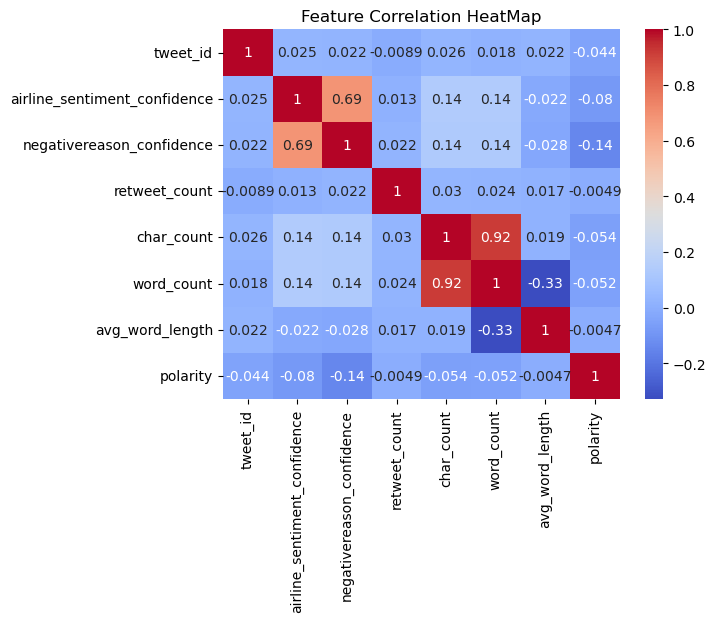

In [15]:
columns = ['tweet_id', 'airline_sentiment_confidence','negativereason_confidence','retweet_count','char_count',
           'word_count','avg_word_length','polarity']
correlation = data[columns].corr()
sns.heatmap(correlation, annot = True, cmap ='coolwarm')
plt.title("Feature Correlation HeatMap")
plt.show()

In [ ]:
# ALl the steps in one function using spacy
'''def spacy_preprocess(text):
    """
    - Lowercases text
    - Removes punctuation, numbers, and stop words
    - Lemmatizes tokens
    """
    doc = nlp(text)
    
    cleaned_tokens = [
        token.lemma_.lower()         # Lemmatize and lowercase
        for token in doc
        if token.is_alpha and not token.is_stop  # Remove punctuation, numbers, stopwords
    ]
    
    return " ".join(cleaned_tokens) '''

